In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


KeyboardInterrupt: 

In [ ]:
Churn_data = pd.read_csv('/Users/samarthvajpeyi/Documents/Python_Projects/Pandas/data/Customer_Churn.csv')

In [ ]:
print(Churn_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 859.5+ KB
None


In [ ]:
print(Churn_data.shape)

(10000, 11)


In [ ]:
print(Churn_data.head(5))

   RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0        747    15787619      Hsieh          844    France    Male   18   
1       1620    15770309   McDonald          656    France    Male   18   
2       1679    15569178  Kharlamov          570    France  Female   18   
3       2022    15795519   Vasiliev          716   Germany  Female   18   
4       2137    15621893   Bellucci          727    France    Male   18   

   Tenure    Balance  EstimatedSalary  Exited  
0       2  160980.03        145936.28       0  
1      10  151762.74        127014.32       0  
2       4   82767.42         71811.90       0  
3       3  128743.80        197322.13       0  
4       4  133550.67         46941.41       0  


In [ ]:
print(Churn_data.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
EstimatedSalary    0
Exited             0
dtype: int64


In [ ]:
df_cleaned = Churn_data.drop_duplicates()

In [ ]:
print(df_cleaned.head(5))

   RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0        747    15787619      Hsieh          844    France    Male   18   
1       1620    15770309   McDonald          656    France    Male   18   
2       1679    15569178  Kharlamov          570    France  Female   18   
3       2022    15795519   Vasiliev          716   Germany  Female   18   
4       2137    15621893   Bellucci          727    France    Male   18   

   Tenure    Balance  EstimatedSalary  Exited  
0       2  160980.03        145936.28       0  
1      10  151762.74        127014.32       0  
2       4   82767.42         71811.90       0  
3       3  128743.80        197322.13       0  
4       4  133550.67         46941.41       0  


In [ ]:
df_age_filter = df_cleaned[df_cleaned['Age']< 40]
print(df_age_filter.describe().round(0))

       RowNumber  CustomerId  CreditScore     Age  Tenure   Balance  \
count     5987.0      5987.0       5987.0  5987.0  5987.0    5987.0   
mean      5005.0  15690741.0        652.0    32.0     5.0   74695.0   
std       2893.0     71594.0         97.0     5.0     3.0   62883.0   
min          4.0  15565701.0        350.0    18.0     0.0       0.0   
25%       2490.0  15628286.0        584.0    29.0     3.0       0.0   
50%       5035.0  15690939.0        654.0    33.0     5.0   95377.0   
75%       7494.0  15753194.0        719.0    36.0     7.0  127402.0   
max      10000.0  15815660.0        850.0    39.0    10.0  250898.0   

       EstimatedSalary  Exited  
count           5987.0  5987.0  
mean           99230.0     0.0  
std            57729.0     0.0  
min               90.0     0.0  
25%            49597.0     0.0  
50%            98950.0     0.0  
75%           148533.0     0.0  
max           199953.0     1.0  


In [ ]:
sorted_df = df_cleaned.sort_values(by=['Tenure','CreditScore'],ascending=False)
print(sorted_df.head(10))

      RowNumber  CustomerId       Surname  CreditScore Geography  Gender  Age  \
1345       1557    15772777  Onyemachukwu          850     Spain  Female   29   
1429       3831    15720713      Chibueze          850    France  Female   29   
1885       7372    15624850         Grant          850    France    Male   30   
2801        224    15733247     Stevenson          850    France    Male   33   
4374       5164    15633870        Ozioma          850    France  Female   36   
5637       1800    15612776         McKay          850     Spain  Female   39   
8161       3110    15735878           Law          850   Germany  Female   47   
8624       1873    15706593         Ellis          850     Spain  Female   50   
9159       5135    15641604       Frolova          850    France  Female   55   
9893       9647    15603111          Muir          850     Spain    Male   71   

      Tenure    Balance  EstimatedSalary  Exited  
1345      10       0.00         94815.04       0  
1429  

- In the above cell, the data frame is sorted in descending order on the basis of credit scores. A pattern, indicating the higher lower probability of churn in consumer profile with higher credit score can be seen. 
- In the next step, to further investigate this pattern, exploratory graphing will be done on, first - orginal data set, and then on binned data frame.

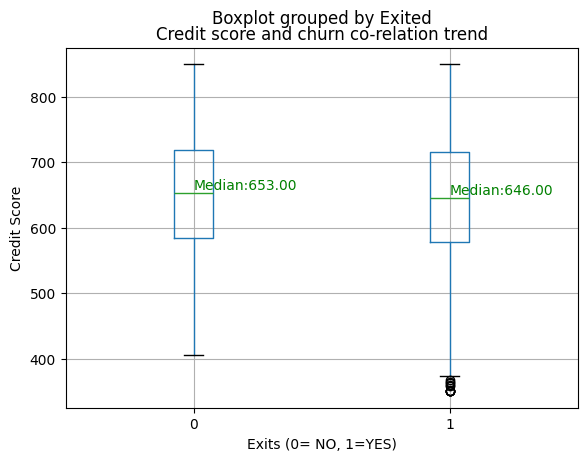

In [ ]:
df_cleaned.boxplot(column='CreditScore',by='Exited')
plt.title('Credit score and churn co-relation trend')

medians = df_cleaned.groupby('Exited')['CreditScore'].median()
for x, median in enumerate(medians, start=1):
    plt.text(x, median + 5, f"Median:{median:.2f}",ha = 'left', color ='green', fontweight ='light')
    
plt.xlabel('Exits (0= NO, 1=YES)')
plt.ylabel('Credit Score')
plt.grid(True)
plt.show()

- From the above boxplot, it can be observed that the medians relative to the credit scores in the two exit categories are almost same, and the plots are not notched and hence it co-relation cannot be established.
- In the group 1, there are some some outliers, suggesting a co-relation between lower credit score with higher chances of churn.  
- In the next step, Mann-Whitney U Test will be perfomed to establish, if the difference in medians are statistically significant. 

In [ ]:
# Segregating the dataset into non-churned and churned groups. 
customer_group = df_cleaned.loc[df_cleaned['Exited']==0,['Exited','CreditScore']]
churned_group = df_cleaned.loc[df_cleaned['Exited']==1,['Exited','CreditScore']]
print(customer_group)
print(churned_group)

      Exited  CreditScore
0          0          844
1          0          656
2          0          570
3          0          716
4          0          727
...      ...          ...
9994       0          537
9996       0          787
9997       0          513
9998       0          753
9999       0          705

[7963 rows x 2 columns]
      Exited  CreditScore
5          1          674
19         1          644
32         1          589
52         1          613
58         1          835
...      ...          ...
9893       1          850
9914       1          782
9916       1          523
9936       1          546
9995       1          408

[2037 rows x 2 columns]


In [ ]:
statistic, p_value = mannwhitneyu(customer_group,churned_group, alternative='two-sided')
print(f'Mann-Whitney U statistic: {statistic}, p-value:{p_value}')

Mann-Whitney U statistic: [      0. 8381083.], p-value:[0.         0.01986866]


## **SUMMARY OF FIRST EXPLORATORY ANALYSIS**
### Hypothesis Recap

### Null hypothesis (H₀):
> There is no difference in the distribution of credit scores between customers who churned and those who did not.
### Alternative hypothesis (H₁):
> The distribution of credit scores is different between the two groups (i.e., lower scores may be associated with a higher chance of churn).

### Boxplot Interpretation:
1. The median difference is small (8 points) – this is not likely to be meaningful in a practical sense.
2. The distribution of the churned group is more spread, especially on the lower end, which may explain the statistical significance but has no practical implication to warrent change in strategy.


### Mann-Whitney U Test Result Interpretation:
1. Since p < 0.05, the null hypothesis at the 5% significance level, can be rejected.
2. This suggests that there is a statistically significant difference between the credit score distributions of churned and non-churned customers.
3. However, the difference, while statistically significant, may not be practically significant, so we need to inspect the magnitude and context more closely.

### NEXT STEPS:
1. Median values are close, which suggests credit score alone is not a strong standalone predictor of churn.
2. Since the overall difference in small, the credit score alone is not sufficient to predict churn reliably – it should be combined with other variables for a more robust model.





In [ ]:
print(df_cleaned.head(10))

   RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0        747    15787619      Hsieh          844    France    Male   18   
1       1620    15770309   McDonald          656    France    Male   18   
2       1679    15569178  Kharlamov          570    France  Female   18   
3       2022    15795519   Vasiliev          716   Germany  Female   18   
4       2137    15621893   Bellucci          727    France    Male   18   
5       2142    15758372    Wallace          674    France    Male   18   
6       3331    15657439       Chao          738    France    Male   18   
7       3513    15657779     Boylan          806     Spain    Male   18   
8       3518    15757821    Burgess          771     Spain    Male   18   
9       3687    15665327   Cattaneo          706    France    Male   18   

   Tenure    Balance  EstimatedSalary  Exited  
0       2  160980.03        145936.28       0  
1      10  151762.74        127014.32       0  
2       4   82767.42         7

In [ ]:
df_male = df_cleaned.loc[df_cleaned['Gender']=='Male',['Gender']]
df_male_churned = df_cleaned.loc[(df_cleaned['Exited']== 1)&(df_cleaned['Gender']=='Male'),['Gender','Exited']]
Churn_rate_male = df_male_churned['Gender'].count()/df_male['Gender'].count()*100
print(f'The churn in male population is {Churn_rate_male.round(3)}%')

The churn in male population is 16.456%


In [ ]:
df_female = df_cleaned.loc[df_cleaned['Gender']=='Female',['Gender']]
df_female_churned = df_cleaned.loc[(df_cleaned['Exited']== 1)&(df_cleaned['Gender']=='Female'),['Gender','Exited']]
Churn_rate_female = df_female_churned['Gender'].count()/df_female['Gender'].count()*100
print(f'The churn in female population is {Churn_rate_female.round(3)}%')

The churn in female population is 25.072%


In [ ]:
churned_population = df_cleaned.loc[df_cleaned['Exited']==1,['Exited']]
total_population = df_cleaned['Exited']
population_chrun_rate = churned_population['Exited'].count()/total_population.count()*100
print(f'The churn in population is {population_chrun_rate.round(3)}%')

2037
10000
The churn in population is 20.37%


In [ ]:
Unique_countries = df_cleaned['Geography'].unique()
print(f'The population in dataset belongs to the list of following countries: {Unique_countries}')

# Geography wise churn

Churn_France = df_cleaned.loc[(df_cleaned['Geography']=='France')&(df_cleaned['Exited']==1),['Geography','Exited']]
total_French = df_cleaned[df_cleaned['Geography']=='France']
French_churn = Churn_France['Geography'].count()/total_French['Geography'].count()*100
Churn_DE = df_cleaned.loc[(df_cleaned['Geography']=='Germany')&(df_cleaned['Exited']==1),['Geography','Exited']]
total_DE = df_cleaned[df_cleaned['Geography']=='Germany']
DE_churn = Churn_DE['Geography'].count()/total_DE['Geography'].count()*100
Churn_ESP = df_cleaned.loc[(df_cleaned['Geography']=='Spain')&(df_cleaned['Exited']==1),['Geography','Exited']]
total_ESP = df_cleaned[df_cleaned['Geography']=='Spain']
ESP_churn = Churn_ESP['Geography'].count()/total_ESP['Geography'].count()*100

print(f'The churn in geography wise population is: France {French_churn.round(3)}%, Germany {DE_churn.round(3)}%, Spain {ESP_churn.round(3)}%')




The population in dataset belongs to the list of following countries: ['France' 'Germany' 'Spain']
The churn in geography wise population is: France 16.155%, Germany 32.443%, Spain 16.673%


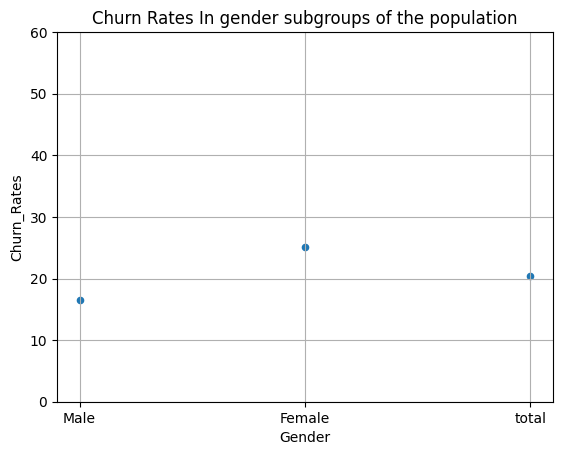

In [ ]:
Gender_churn = pd.DataFrame({
    'Name': ['Male','Female','total'],
    'Churn_Rates':[Churn_rate_male.round(2),Churn_rate_female.round(2),population_chrun_rate.round(2)]
})

Gender_churn.plot.scatter(x='Name',y='Churn_Rates')


plt.ylim(0,60)
plt.title('Churn Rates In gender subgroups of the population')
plt.xlabel('Gender')
plt.ylabel('Churn_Rates')
plt.grid(True)
plt.show()

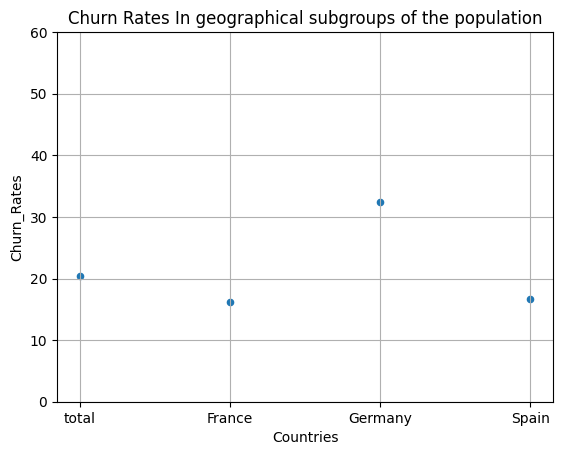

In [ ]:
Geographical_churn = pd.DataFrame({
    'Name': ['total','France','Germany','Spain'],
    'Churn_Rates':[population_chrun_rate.round(2),French_churn.round(2),DE_churn.round(2),ESP_churn.round(2)]
})

Geographical_churn.plot.scatter(x='Name',y='Churn_Rates')


plt.ylim(0,60)
plt.title('Churn Rates In geographical subgroups of the population')
plt.xlabel('Countries')
plt.ylabel('Churn_Rates')
plt.grid(True)
plt.show()

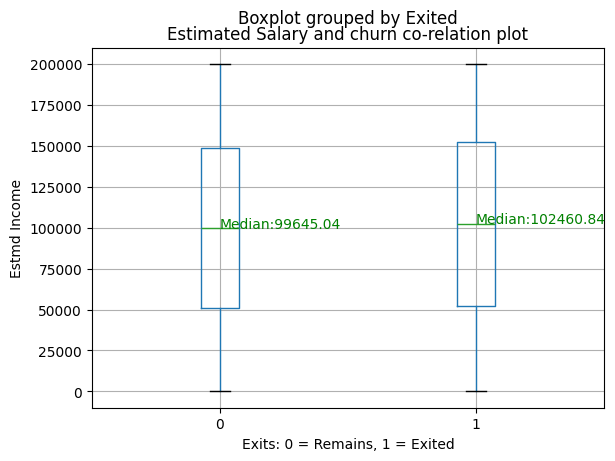

In [ ]:
df_cleaned.boxplot(column='EstimatedSalary', by='Exited')
plt.title('Estimated Salary and churn co-relation plot')

income_medians = df_cleaned.groupby('Exited')['EstimatedSalary'].median()
for i, median in enumerate(income_medians, start=1):
    plt.text(i, median + 5, f"Median:{median:.2f}",ha = 'left', color ='green', fontweight ='light')

plt.xlabel('Exits: 0 = Remains, 1 = Exited')
plt.ylabel('Estmd Income')
plt.grid(True)
plt.show()
    


In [ ]:
predictor_vars = df_cleaned[['EstimatedSalary','CreditScore']]
dependent_var  = df_cleaned['Exited']
Predictor_vars = sm.add_constant(predictor_vars)
logit_model = sm.Logit(dependent_var, predictor_vars)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.506608
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Tue, 15 Jul 2025   Pseudo R-squ.:               -0.002214
Time:                        10:09:16   Log-Likelihood:                -5066.1
converged:                       True   LL-Null:                       -5054.9
Covariance Type:            nonrobust   LLR p-value:                     1.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
EstimatedSalary -9.044e-08   4.17e-07     -0.217      0.828   -9.07e-07    7.27e-07
CreditScore   

In [ ]:
predictor_vars_X = df_cleaned[['EstimatedSalary','CreditScore']]
dependent_var_y  = df_cleaned['Exited']
X_train, X_test, Y_train, Y_test = train_test_split(predictor_vars_X,dependent_var_y,test_size=0.2,random_state=42)
model = LogisticRegression()
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
print("Accuracy", accuracy_score(Y_test,y_pred))
print("confusion_matrix:\n ", classification_report(Y_test,y_pred))

Accuracy 0.795
confusion_matrix:
                precision    recall  f1-score   support

           0       0.80      1.00      0.89      1590
           1       0.00      0.00      0.00       410

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.70      2000



/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

> The first results of logistic regression were highly biased towards the non-churners because of the higher proportion of non-churned customers in dataset in comparison with churners. 
> Thus, although the model accuracy was almost 80% but because of the imbalance, it does not paint the accurate picture, which is evident fron 0.00 in instances in 1 (churned) category of confusion matrix. 
> In the next step we will try to rectify this by prompting the model to balance the instances of churned on not-churned. 

Accuracy 0.5025
confusion_matrix:
                precision    recall  f1-score   support

           0       0.80      0.50      0.62      1590
           1       0.21      0.50      0.29       410

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.45      2000
weighted avg       0.67      0.50      0.55      2000



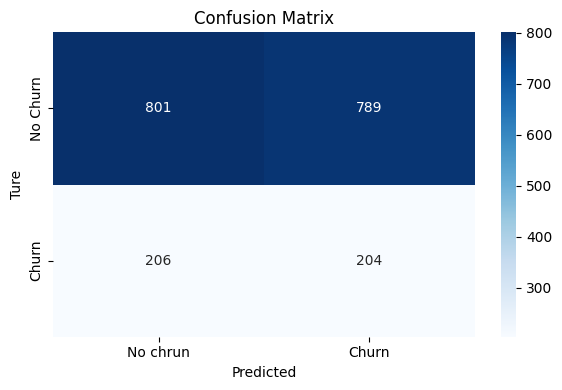

In [ ]:
predictor_vars_X = df_cleaned[['EstimatedSalary','CreditScore']]
dependent_var_y  = df_cleaned['Exited']
X_train, X_test, Y_train, Y_test = train_test_split(predictor_vars_X,dependent_var_y,test_size=0.2,random_state=42)
model = LogisticRegression(class_weight='balanced')
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
print("Accuracy", accuracy_score(Y_test,y_pred))
print("confusion_matrix:\n ", classification_report(Y_test,y_pred))
cm = confusion_matrix(Y_test,y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True,fmt='d',cmap='Blues',xticklabels=['No chrun','Churn'],yticklabels=['No Churn','Churn'])
plt.xlabel('Predicted')
plt.ylabel('Ture')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

Accuracy 0.5085
confusion_matrix:
                precision    recall  f1-score   support

           0       0.80      0.51      0.62      1590
           1       0.21      0.52      0.30       410

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.46      2000
weighted avg       0.68      0.51      0.56      2000



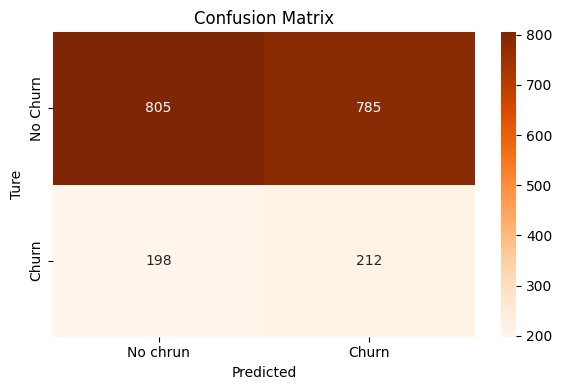

In [ ]:
predictor_vars_X = df_cleaned[['CreditScore']]
dependent_var_y  = df_cleaned['Exited']
X_train, X_test, Y_train, Y_test = train_test_split(predictor_vars_X,dependent_var_y,test_size=0.2,random_state=42)
model = LogisticRegression(class_weight='balanced')
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
print("Accuracy", accuracy_score(Y_test,y_pred))
print("confusion_matrix:\n ", classification_report(Y_test,y_pred))
cm = confusion_matrix(Y_test,y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True,fmt='d',cmap='Oranges',xticklabels=['No chrun','Churn'],yticklabels=['No Churn','Churn'])
plt.xlabel('Predicted')
plt.ylabel('Ture')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

Accuracy 0.511
confusion_matrix:
                precision    recall  f1-score   support

           0       0.79      0.52      0.63      1590
           1       0.20      0.47      0.28       410

    accuracy                           0.51      2000
   macro avg       0.50      0.50      0.46      2000
weighted avg       0.67      0.51      0.56      2000



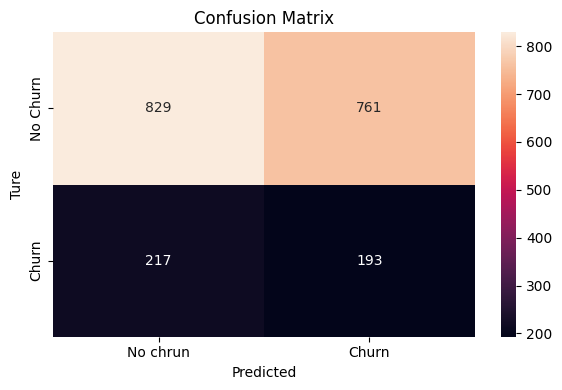

In [ ]:
predictor_vars_X = df_cleaned[['EstimatedSalary']]
dependent_var_y  = df_cleaned['Exited']
X_train, X_test, Y_train, Y_test = train_test_split(predictor_vars_X,dependent_var_y,test_size=0.2,random_state=42)
model = LogisticRegression(class_weight='balanced')
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
print("Accuracy", accuracy_score(Y_test,y_pred))
print("confusion_matrix:\n ", classification_report(Y_test,y_pred))
cm = confusion_matrix(Y_test,y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True,fmt='d',cmap='rocket',xticklabels=['No chrun','Churn'],yticklabels=['No Churn','Churn'])
plt.xlabel('Predicted')
plt.ylabel('Ture')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   EstimatedSalary

In [ ]:
predictor_vars_X = df_cleaned[['EstimatedSalary','CreditScore','Age','Tenure','Balance']]
dependent_var_y  = df_cleaned['Exited']
X_train, X_test, Y_train, Y_test = train_test_split(predictor_vars_X,dependent_var_y,test_size=0.2,random_state=42)
model = LogisticRegression(class_weight='balanced',max_iter=300)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
print("Accuracy", accuracy_score(Y_test,y_pred))
print("confusion_matrix:\n ", classification_report(Y_test,y_pred))
cm = confusion_matrix(Y_test,y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True,fmt='d',cmap='rocket',xticklabels=['No chrun','Churn'],yticklabels=['No Churn','Churn'])
plt.xlabel('Predicted')
plt.ylabel('Ture')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

NameError: name 'df_cleaned' is not defined

In [ ]:
feature_names  = X_train.columns

# Get model coefficients
coefficients = model.coef_[0]  # It's a 2D array; we take the first row

# Combine into a DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Odds_Ratio': np.exp(coefficients)  # Useful for interpretation
})

# Sort by absolute value of coefficient (magnitude of impact)
importance_df['Abs_Coefficient'] = importance_df['Coefficient'].abs()
importance_df = importance_df.sort_values(by='Abs_Coefficient', ascending=False)

# Display
print(importance_df[['Feature', 'Coefficient', 'Odds_Ratio']])

           Feature   Coefficient  Odds_Ratio
2              Age  7.600396e-02    1.078967
3           Tenure -6.736685e-03    0.993286
1      CreditScore -7.783124e-04    0.999222
4          Balance  4.995461e-06    1.000005
0  EstimatedSalary  5.464047e-07    1.000001


### INTERPRETATION: 

1. Negative coefficients (like Tenure, CreditScore): Decrease the probability of customer exiting; they make exit less likely.

2. Negative coefficients (like Tenure, CreditScore): Decrease the probability of customer exiting; they make exit less likely.


## SUMMARY
 - In summary the older customers and those with higher balance and salary are slightly more likely to leave. 
 
 - Customers with longer tenure and higher credit scores are slightly more likely to stay.